# Automatic Speech Recognition Hand-on & Advanced Topics Courses

Created by Yuan-Fu Liao, National Yang Ming Chiao Tung University

* yfliao@nycu.edu.tw

Modified by Shien-Ting Huang, National Yang Ming Chiao Tung University

* sthuang.ee11@nycu.edu.tw
---

# Introduction to Speech Analysis and Feature Extraction

Singing in the MRI with Tyley Ross - Making the Voice Visible
* https://youtu.be/J3TwTb-T044

How Hearing Works - Process of Hearing Animation. Function & Parts of Human Ear. Sound Pathway
* https://youtu.be/T8lKKlnnC6M

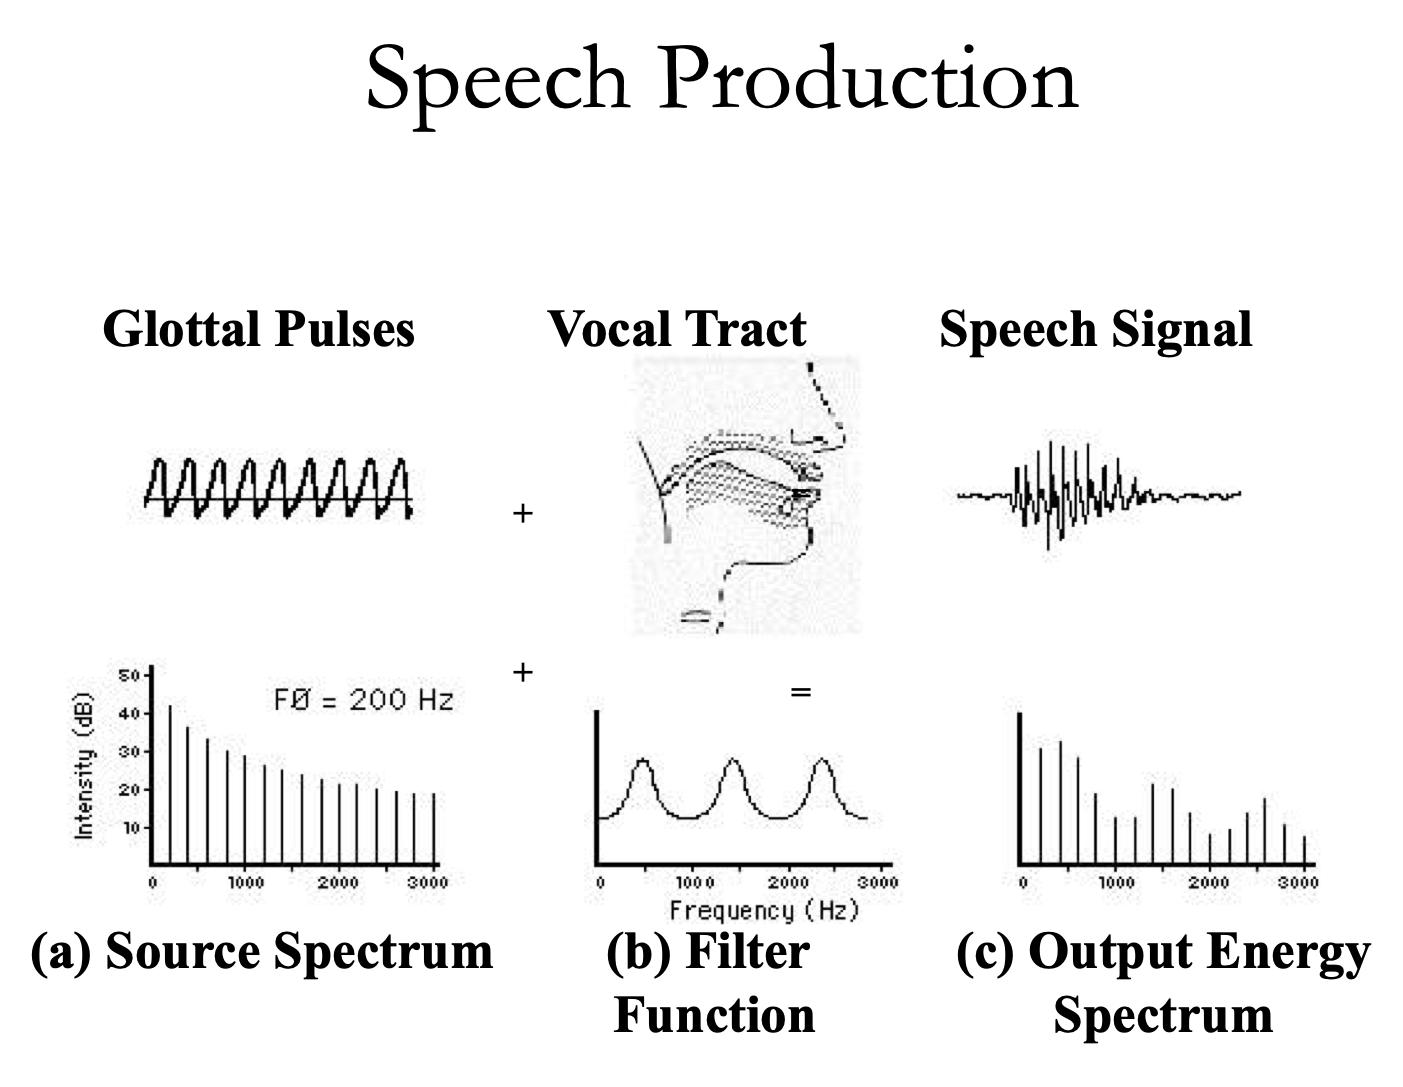

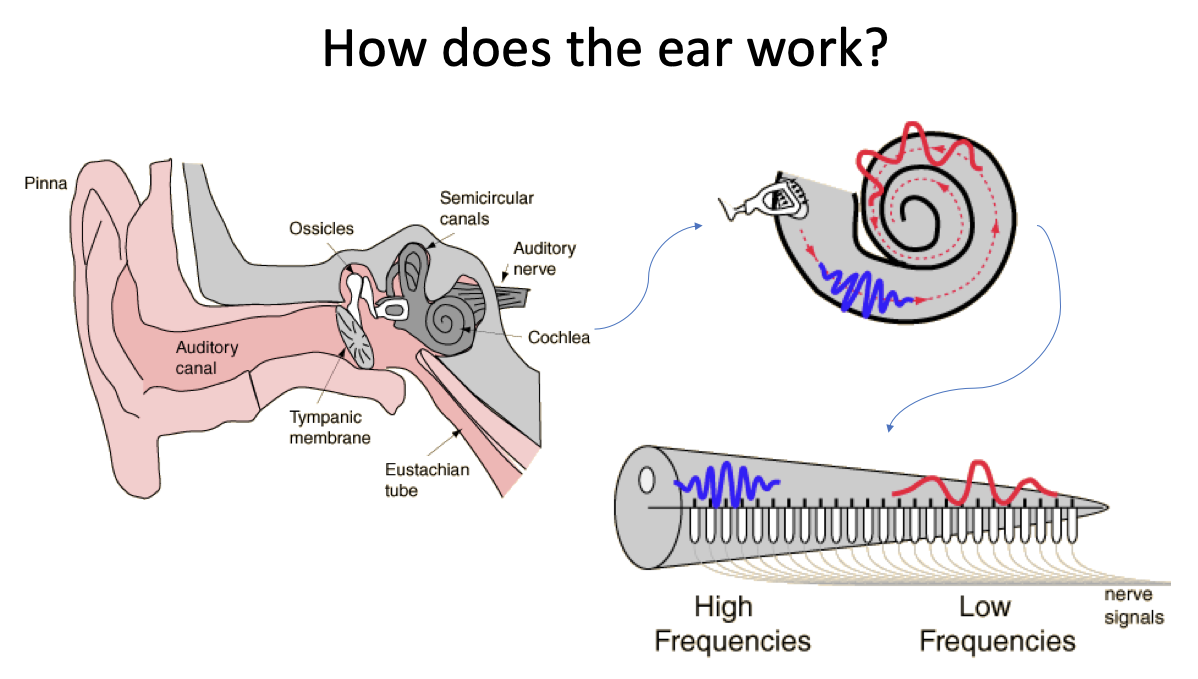

Speech Feature Extraaction

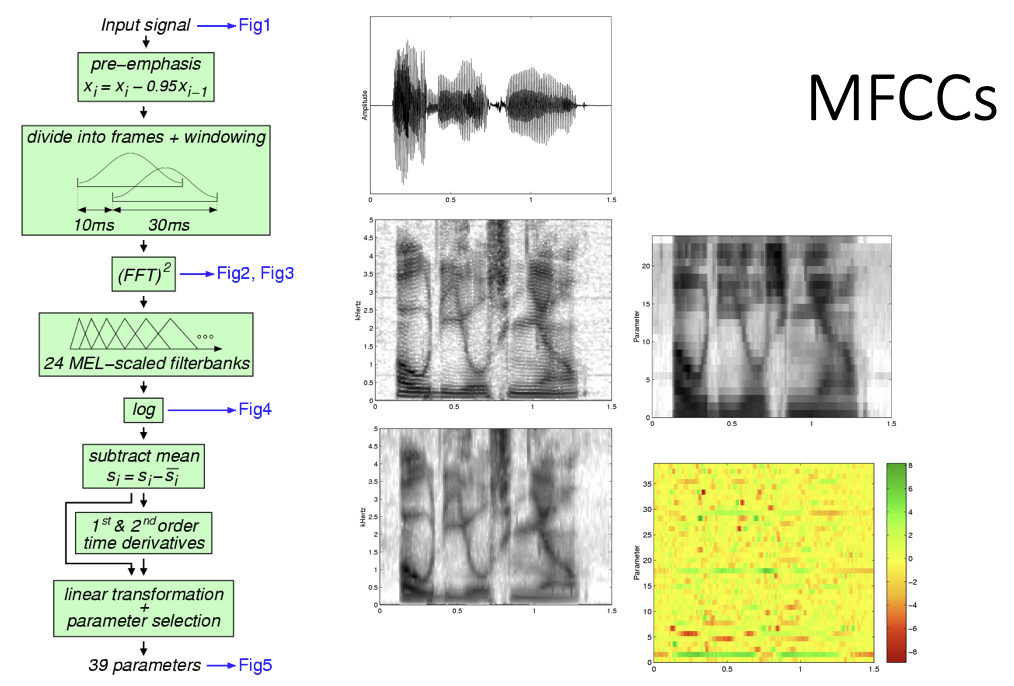

# Virtual Machine

## Hardware and Software

In [43]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.2 LTS
Release:	22.04
Codename:	jammy


In [44]:
import sys ; print(sys.version_info)

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [45]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4399.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscal
                         l nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopo
                         logy nonstop_tsc cpuid tsc_known_freq pni pclmulqdq sss
                         e3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes 
                         xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowpref

In [46]:
!cat /proc/cpuinfo | grep 'core id'

core id		: 0
core id		: 0


In [47]:
#!top

In [48]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [49]:
!df -kh

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   28G   81G  26% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  885M  55% /usr/sbin/docker-init
tmpfs           6.4G   20M  6.4G   1% /var/colab
/dev/sda1        44G   29G   15G  66% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


## Requirements

In [6]:
!sudo apt update
!sudo apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!sudo apt install python3-pyaudio
!pip install pyaudio
!pip install ffmpeg-python
!pip install librosa
!pip install pydub
!pip install praat-parselmouth
!pip install sklearn

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 2s (129 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
19 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependenc

# Microphone

In [7]:
AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);

function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

# Speech Analysis

## Import Packages

In [8]:
import os # to save/open files
import sys
import io
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import ffmpeg
import wave
import pydub
from pydub import AudioSegment
from scipy.io.wavfile import read as wav_read
import matplotlib.pyplot as plt
import librosa
import librosa.display
import parselmouth
from sklearn import preprocessing

## Function Calls

### Read/Write Ausio Files

In [9]:
def write_wav(f, sr, x, normalized=False):
    # 開檔
    f = wave.open(f, "wb")

    # 配置聲道数、量化位数和取樣频率
    f.setnchannels(1)
    f.setsampwidth(2)
    f.setframerate(sr)

    # 轉換為二進制，再寫入檔案
    wave_data = x.astype(np.short)
    f.writeframes(wave_data.tostring())
    f.close()

### Draw Pictures

In [10]:
def get_audio():
		global hnum

		# call microphone
		display(HTML(AUDIO_HTML))
		data = eval_js("data")
		binary = b64decode(data.split(',')[1])

		process = (ffmpeg
	  		.input('pipe:0')
	  		.output('pipe:1', format='wav')
	  		.run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
		)
		output, err = process.communicate(input=binary)

		riff_chunk_size = len(output) - 8
		# Break up the chunk size into four bytes, held in b.
		q = riff_chunk_size
		b = []
		for i in range(4):
				q, r = divmod(q, 256)
				b.append(r)

		# Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
		riff = output[:4] + bytes(b) + output[8:]
		sr, audio = wav_read(io.BytesIO(riff))

		# save
		hnum += 1
		human_sound_file = "human-"+str(hnum)+".wav"
		print(human_sound_file)
		write_wav(human_sound_file, sr, audio)

		return human_sound_file

In [11]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

## Global Variables

In [12]:
hnum = 0

## Analysis
* Feature Extraction for Speech/Speaker/Langauge/Emotion Recognition, Speech Synthesis, Voice Conversion, and so on.

In [13]:
# Human Speak
# human_sound_file = get_audio()
human_sound_file = "mono.wav"

In [21]:
# Speech Analysis: narrowband/wideband specgram, pitch
sr, audio = wav_read(human_sound_file)
print(sr, audio, audio.dtype, audio.shape)
audio = audio.astype(float)

44100 [ 7.4505806e-06  7.4505806e-06  7.4505806e-06 ... -6.2735081e-03
 -7.1533322e-03 -7.8865290e-03] float32 (220500,)


### Waveform

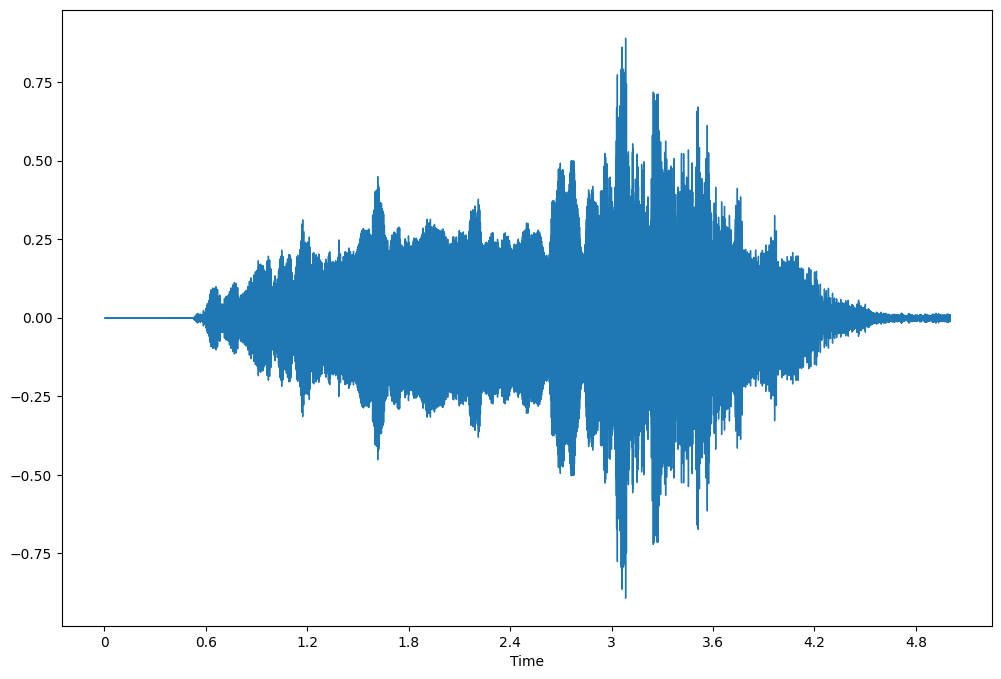

In [15]:
plt.figure(figsize=(12, 8))
librosa.display.waveshow(audio, sr=sr)
plt.show()

### Spectogram

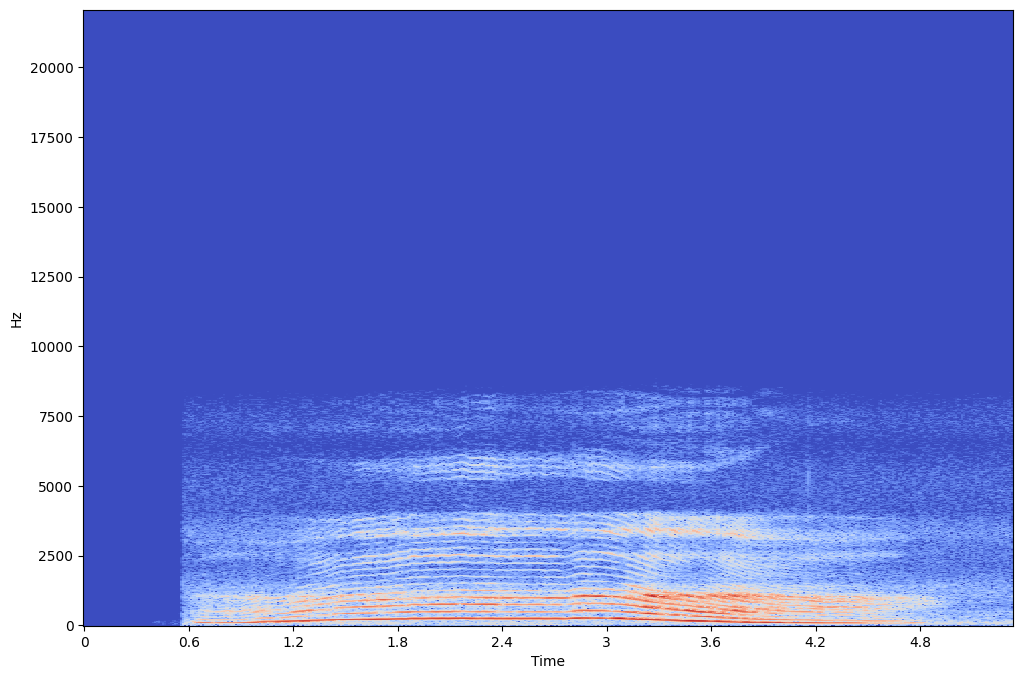

In [16]:
x = librosa.stft(audio, n_fft=2048, hop_length=480) # sampling rate=48000, frame_size=32 ms, frame_shift=10 ms
plt.figure(figsize=(12, 8))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(x)), sr=sr, y_axis='linear', x_axis='time')
plt.show()

### Pitch Tracking

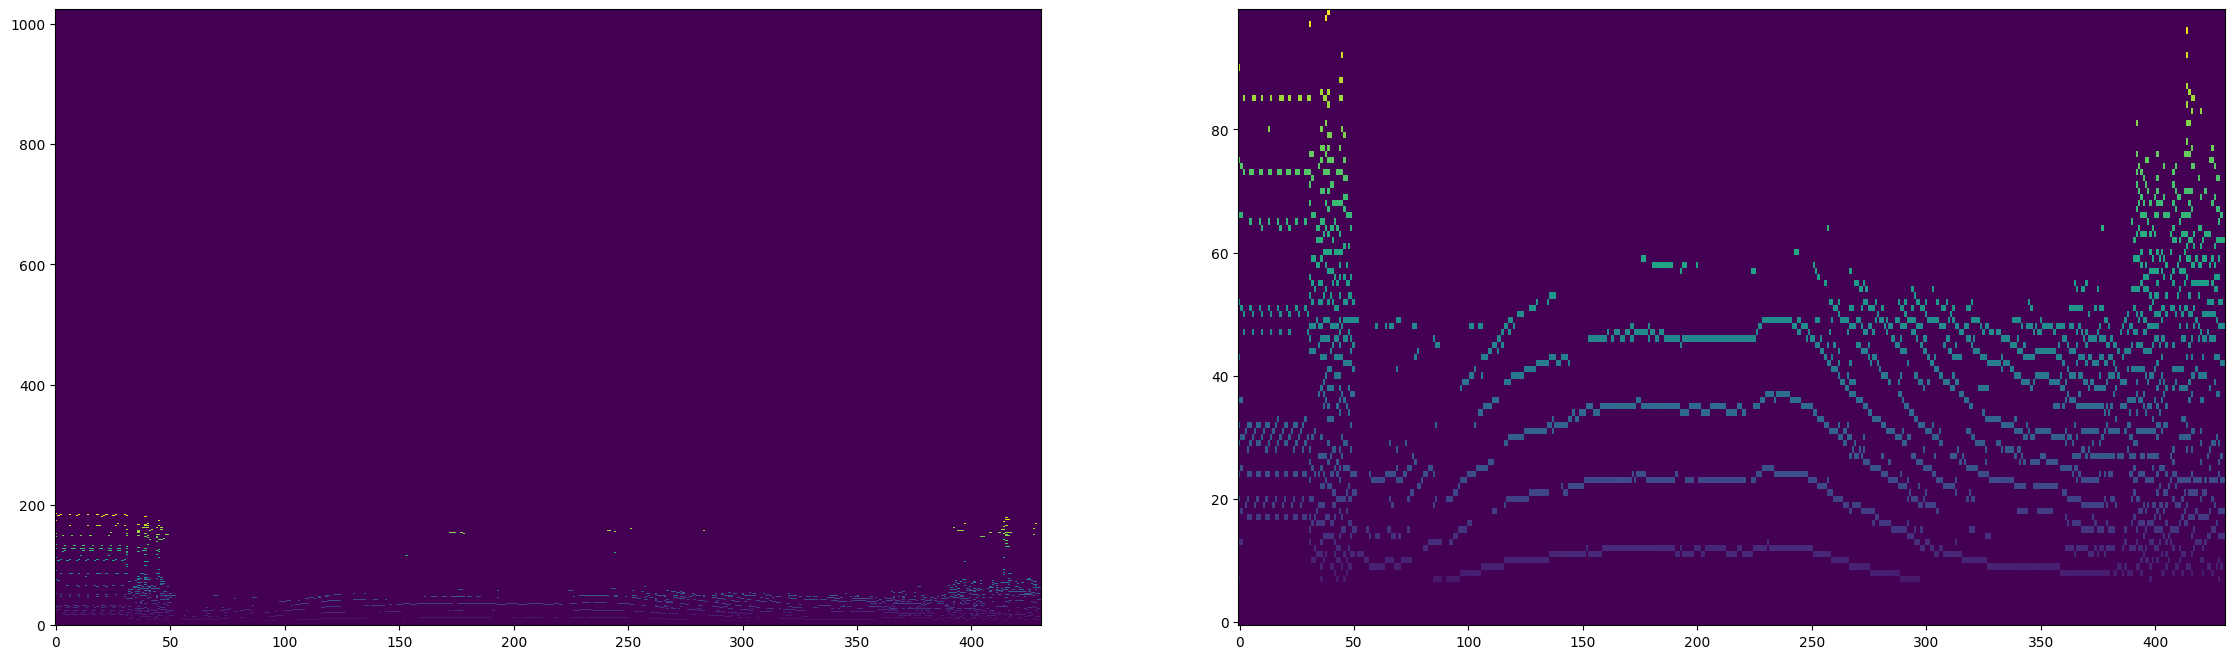

In [17]:
pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
plt.figure(figsize=(28, 8))
plt.subplot(1,2,1)
plt.imshow(pitches[:, :], aspect="auto", interpolation="nearest", origin="lower")
plt.subplot(1,2,2)
plt.imshow(pitches[:100, :], aspect="auto", interpolation="nearest", origin="lower")
plt.show()

### Resampling

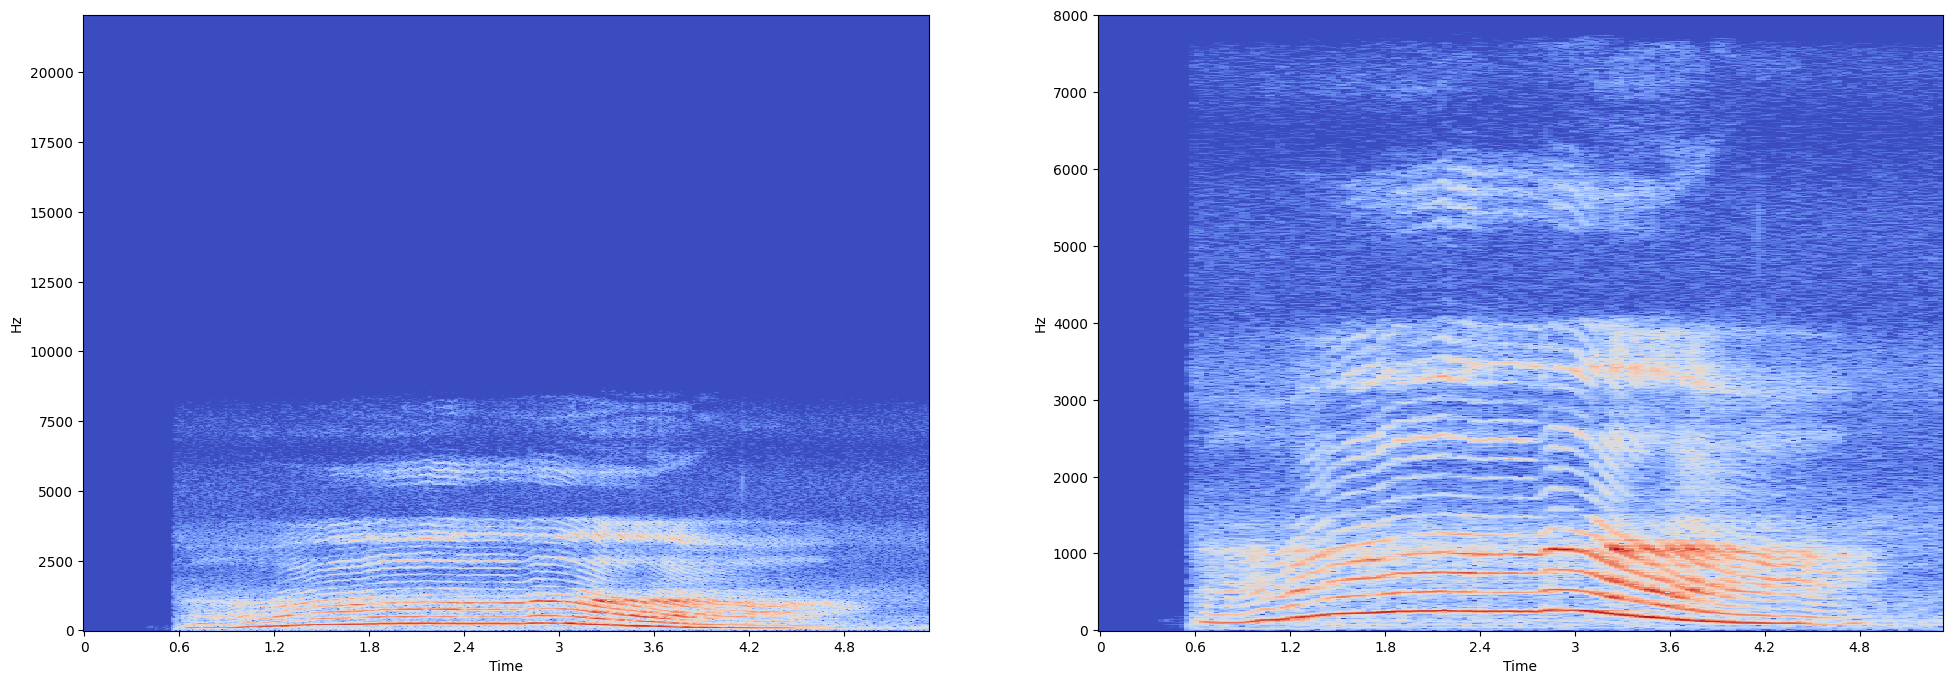

In [22]:
plt.figure(figsize=(24, 8))

plt.subplot(1,2,1)
x = librosa.stft(audio, n_fft=2048, hop_length=480) # # sampling rate=16000, frame_size=32 ms, frame_shift=10 ms
librosa.display.specshow(librosa.amplitude_to_db(np.abs(x)), sr=sr, y_axis='linear', x_axis='time')

# resampling
target_sr = 16000
audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
sr = target_sr

plt.subplot(1,2,2)
x = librosa.stft(audio, n_fft=2048, hop_length=480) # # sampling rate=16000, frame_size=32 ms, frame_shift=10 ms
librosa.display.specshow(librosa.amplitude_to_db(np.abs(x)), sr=sr, y_axis='linear', x_axis='time')

plt.show()

### NarrowBand and WideBand Spectogram

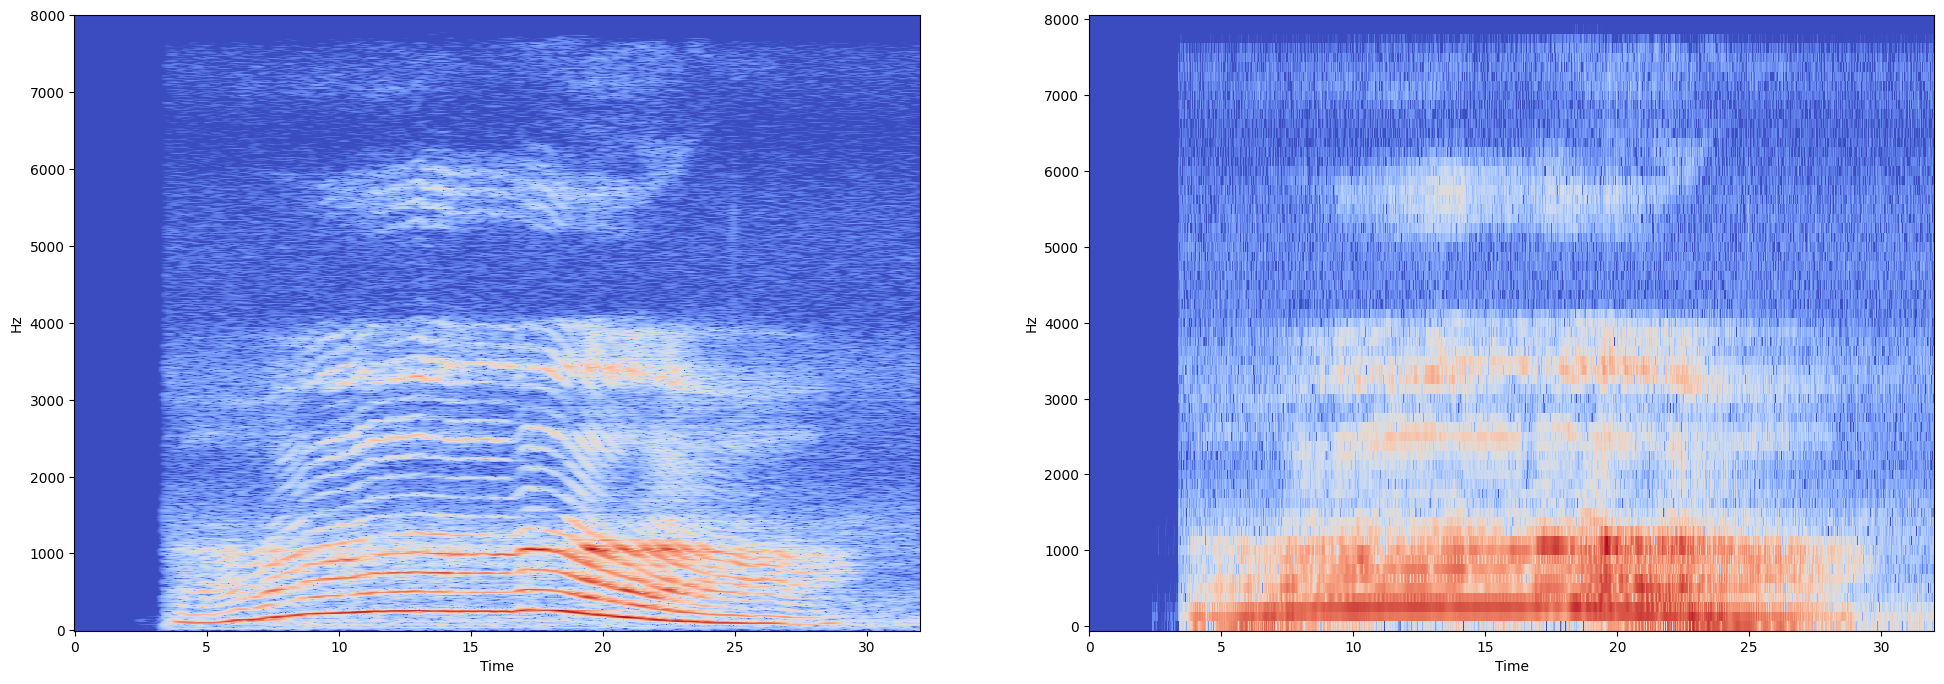

In [23]:
plt.figure(figsize=(24, 8))

plt.subplot(1,2,1)
x = librosa.stft(audio, n_fft=2048, hop_length=80) # # sampling rate=16000, frame_size=32 ms, frame_shift=10 ms
librosa.display.specshow(librosa.amplitude_to_db(np.abs(x)), sr=sr, y_axis='linear', x_axis='time')

plt.subplot(1,2,2)
x = librosa.stft(audio, n_fft=128, hop_length=80) # # sampling rate=16000, frame_size=32 ms, frame_shift=10 ms
librosa.display.specshow(librosa.amplitude_to_db(np.abs(x)), sr=sr, y_axis='linear', x_axis='time')

plt.show()

### Pitch Contour Extraction

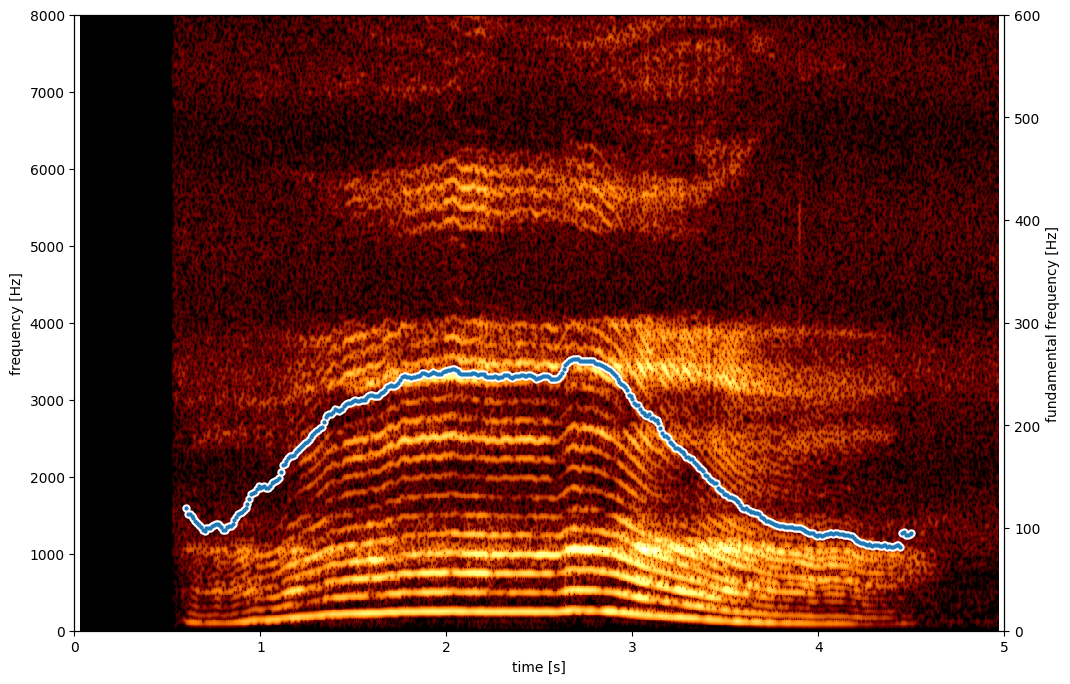

In [24]:
snd = parselmouth.Sound(human_sound_file)
snd.resample(new_frequency=16000)
pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)

plt.figure(figsize=(12, 8))
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

### Mel-Scaled Spectogram

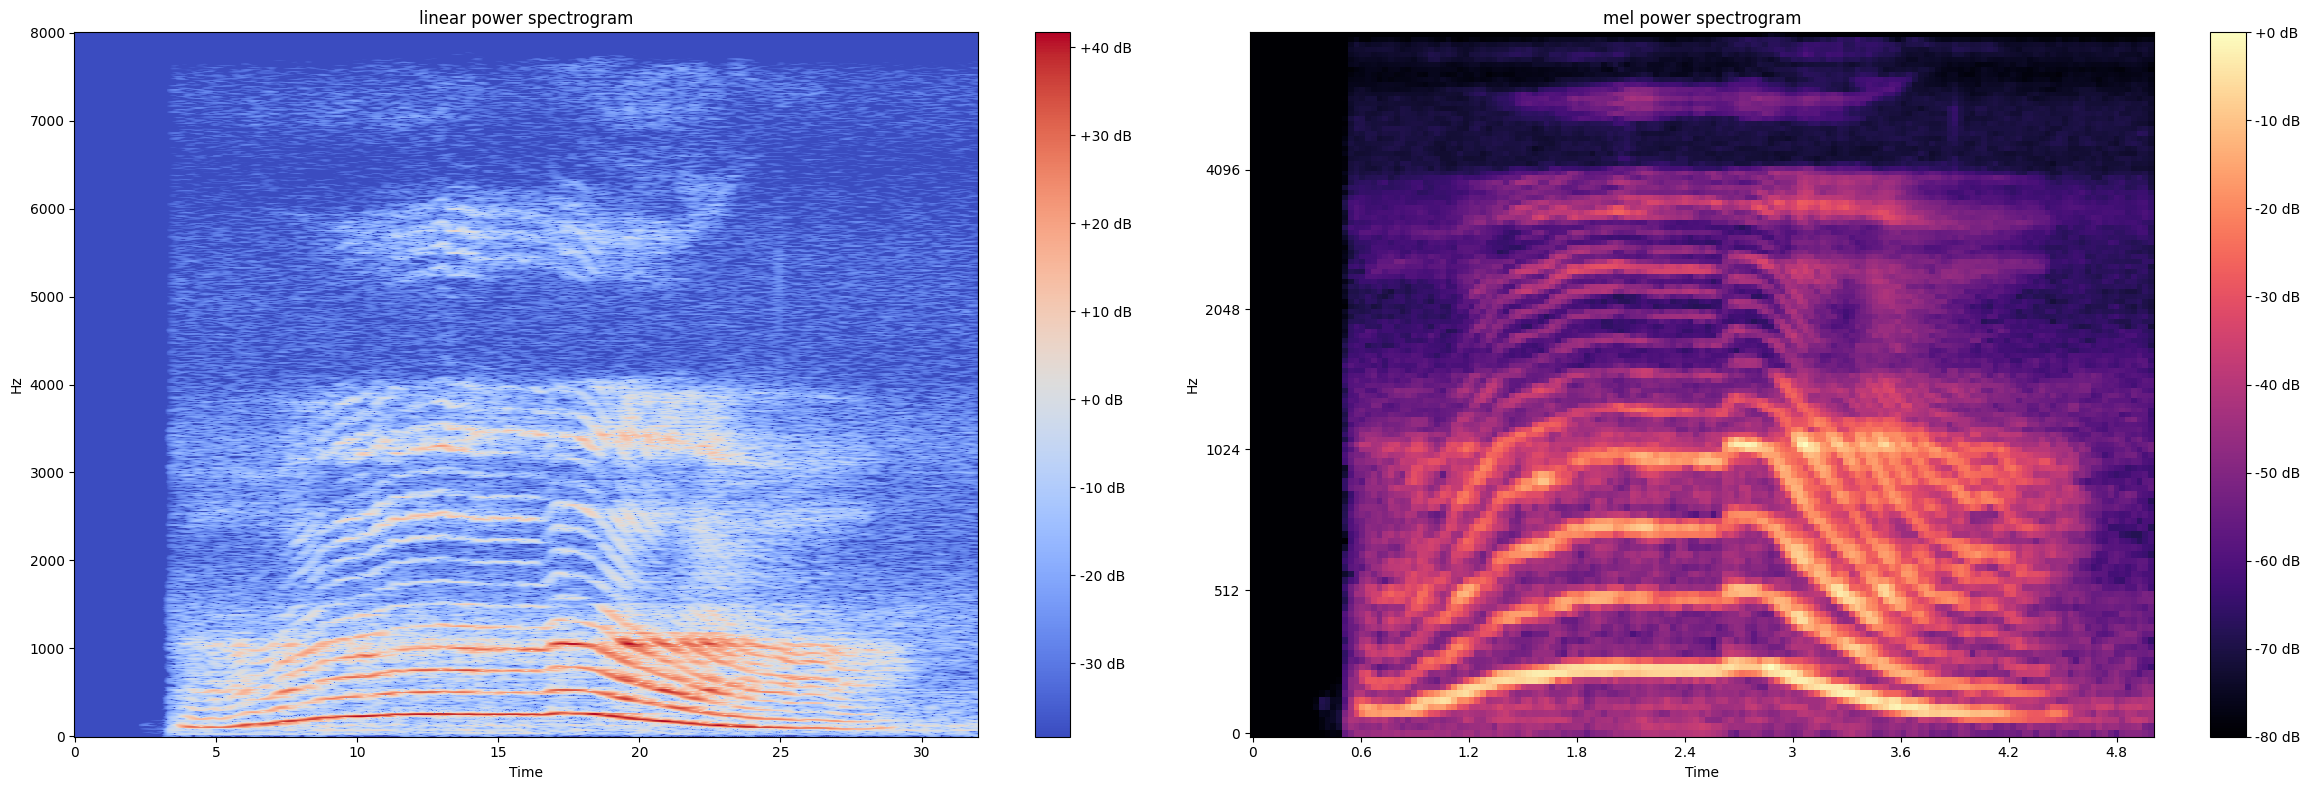

In [25]:
plt.figure(figsize=(24, 8))

plt.subplot(1,2,1)
x = librosa.stft(audio, n_fft=2048, hop_length=80) # # sampling rate=16000, frame_size=32 ms, frame_shift=10 ms
librosa.display.specshow(librosa.amplitude_to_db(np.abs(x)), sr=sr, y_axis='linear', x_axis='time')
# Put a descriptive title on the plot
plt.title('linear power spectrogram')
# draw a color bar
plt.colorbar(format='%+02.0f dB')


plt.subplot(1,2,2)
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)
# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
# Put a descriptive title on the plot
plt.title('mel power spectrogram')
# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

### MFCCs

(13, 157)
[[-9.05096680e+02 -9.05096680e+02 -9.05096680e+02 ... -7.07002362e+02
  -7.09864261e+02 -7.28836367e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.00505248e+01
   7.69845343e+01  7.89226008e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.56450996e-01
  -4.90317624e-01  3.73311704e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.81755509e-01
  -6.63587460e-01 -1.44267316e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.15660292e+01
   6.99313204e+00  5.52155471e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.68903981e+00
   5.29259314e+00  7.66517685e+00]]


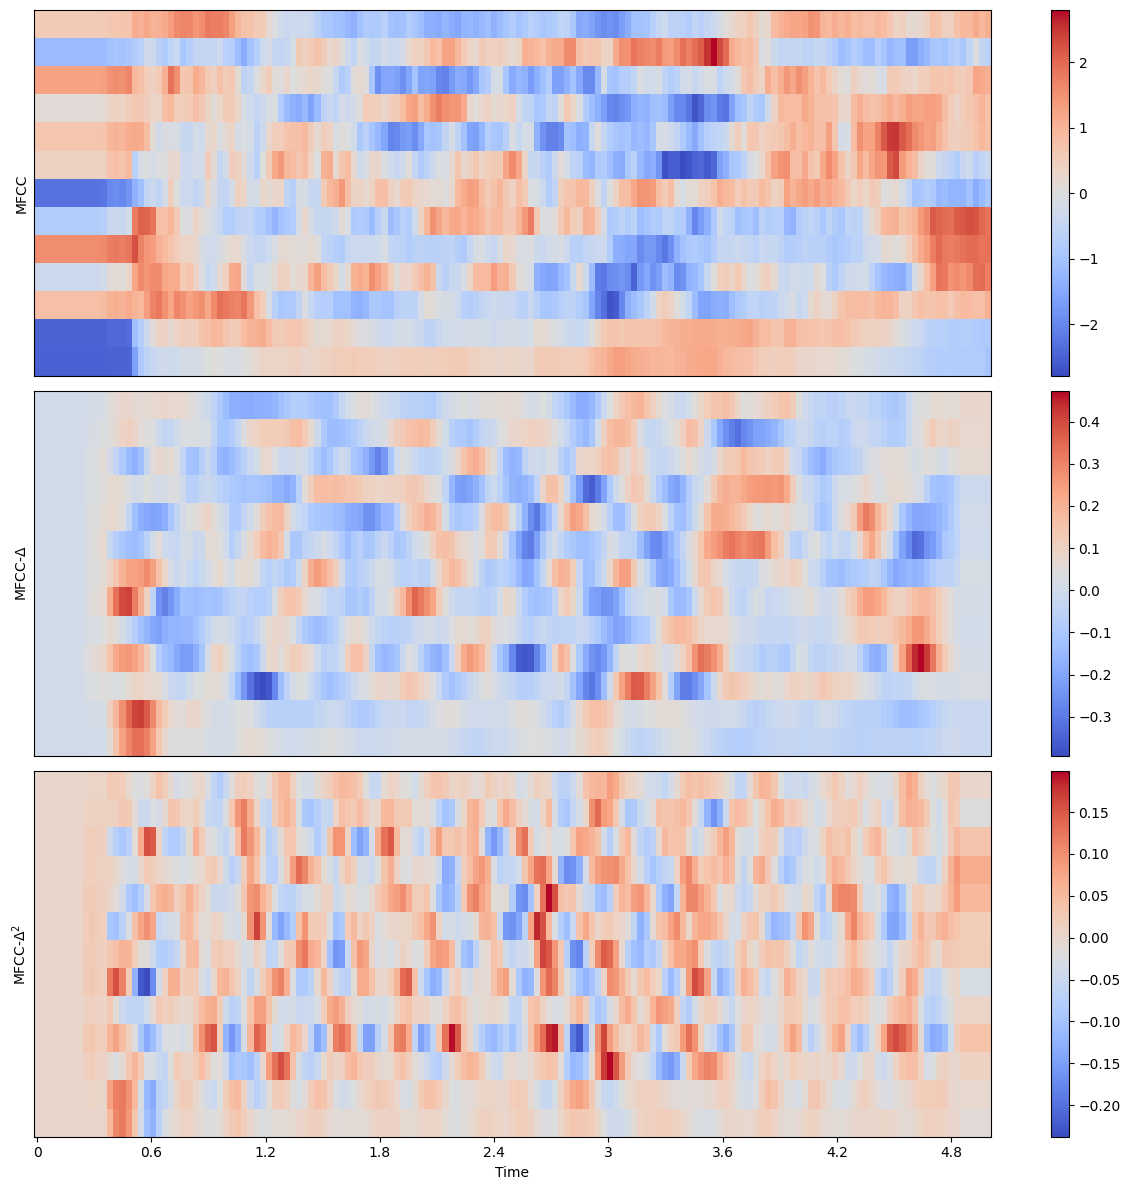

In [27]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)
print(mfcc.shape)
print(mfcc)

# zero mean, unit variance
mfcc        = preprocessing.scale(mfcc,axis=1)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12.5, 12))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])



```
# This is formatted as code
```

# Time-Stretching and Pitch-Shifting

## Introduction

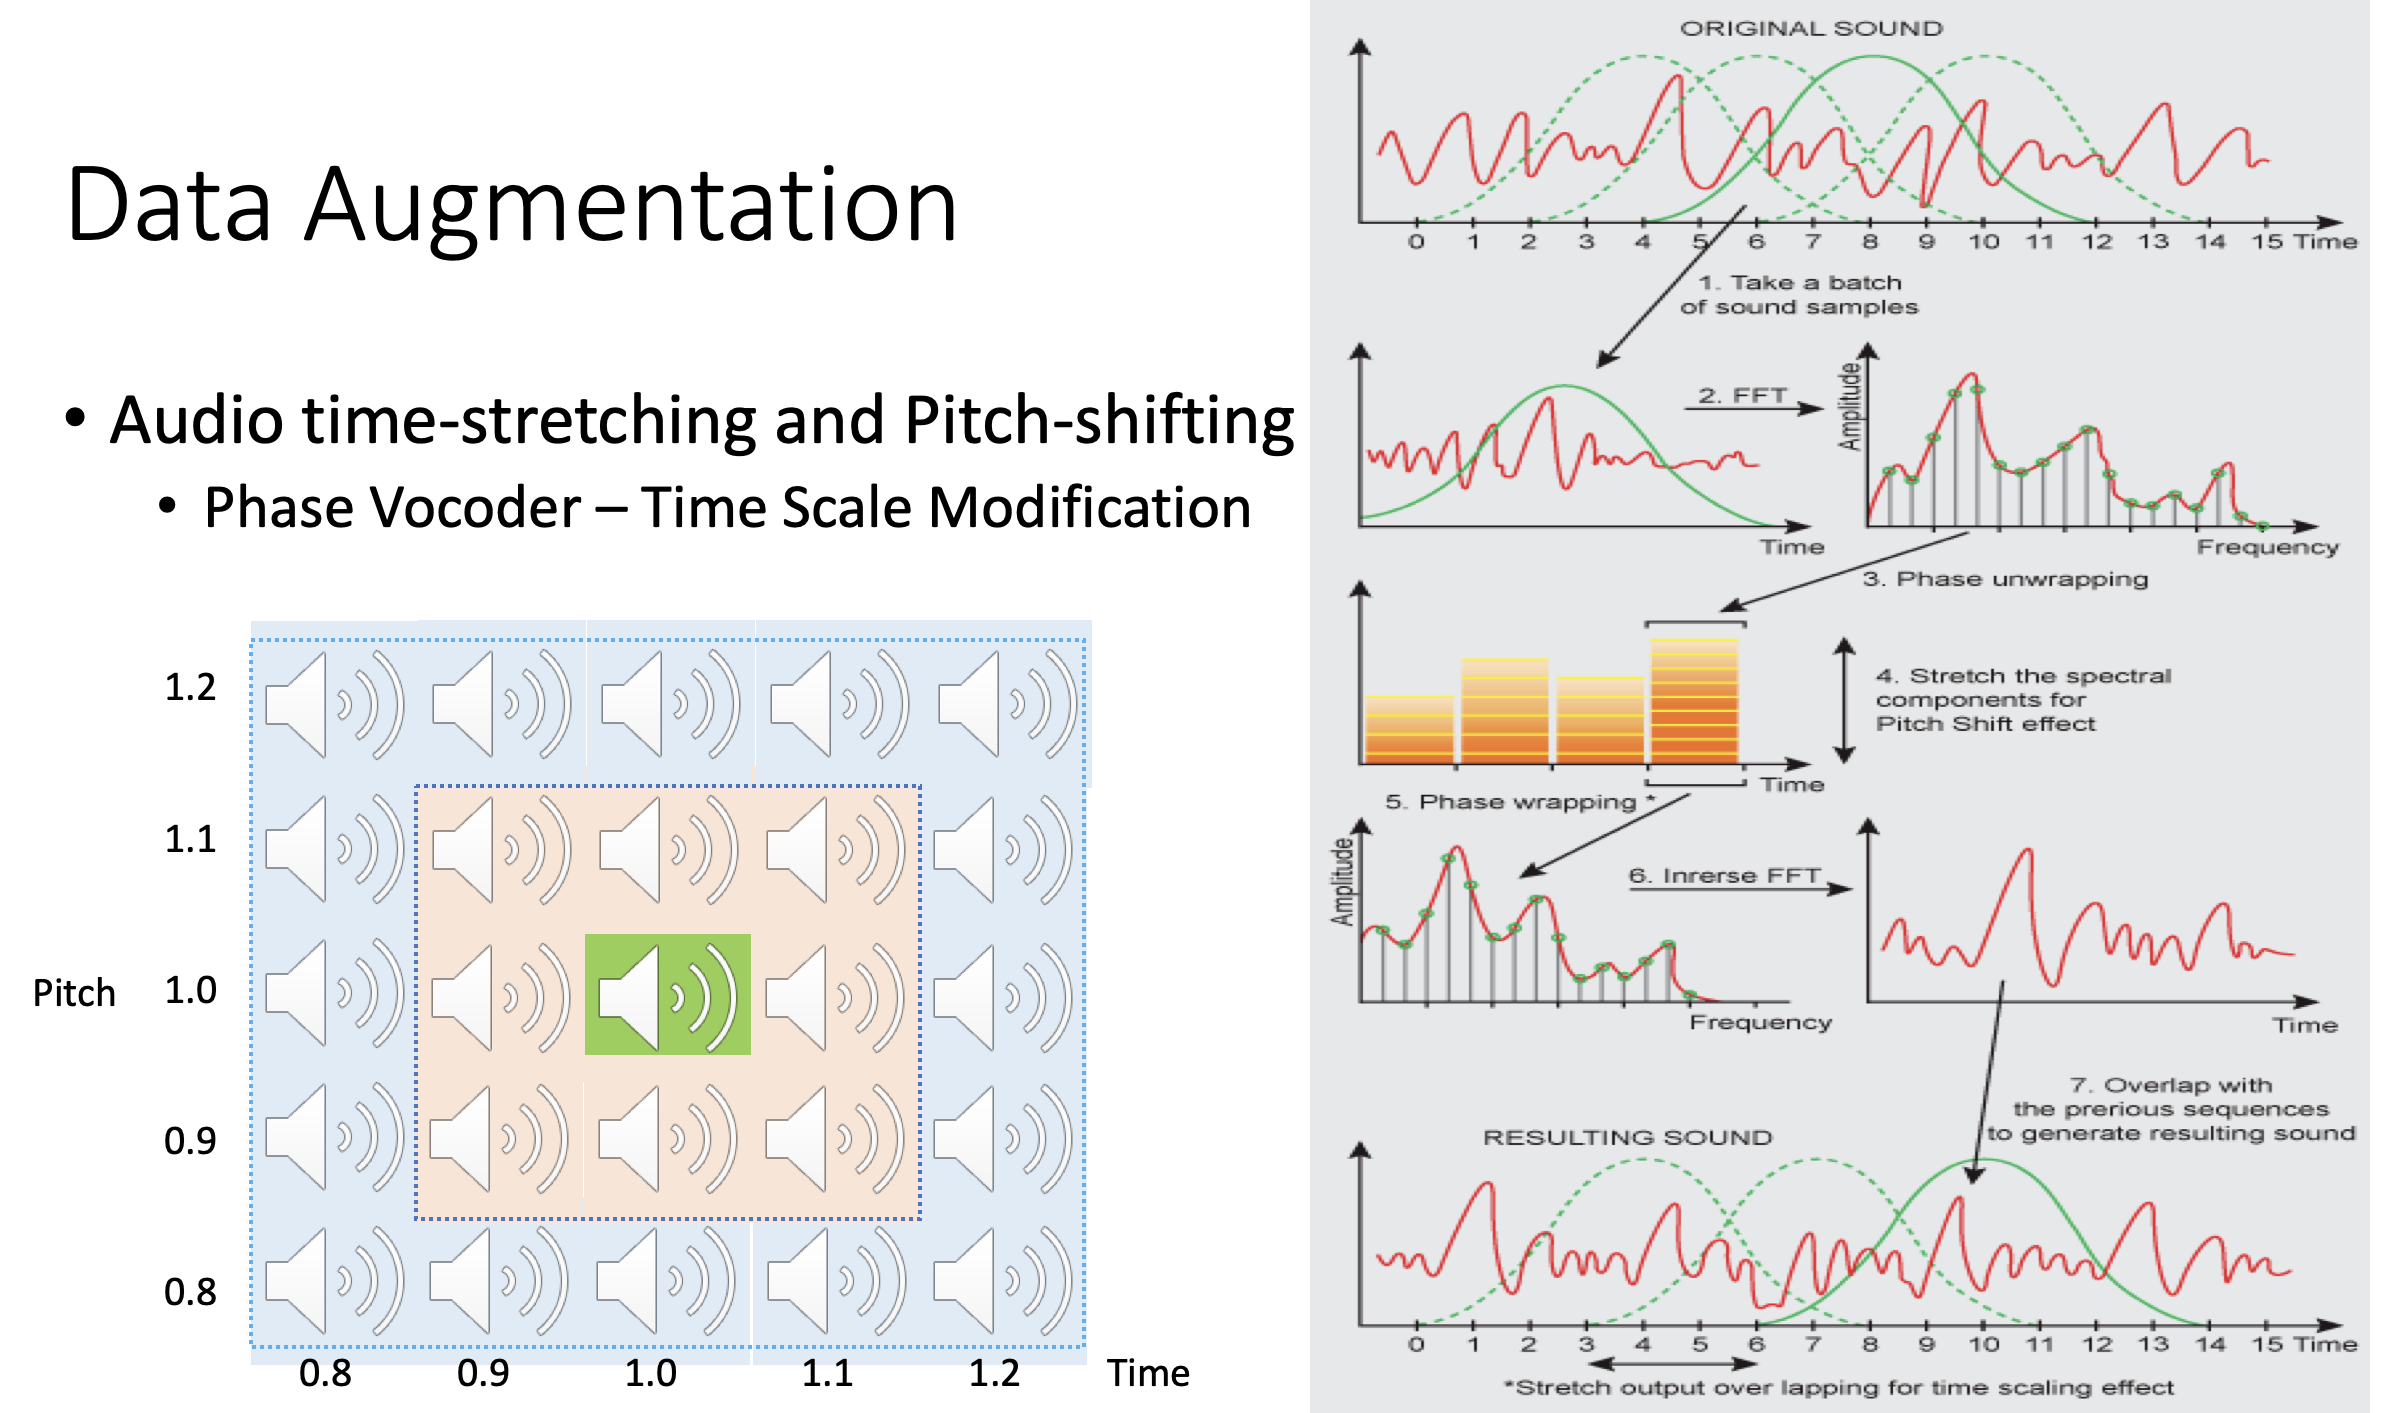

### Rubber Band
* An audio time-stretching and pitch-shifting library and utility program

In [28]:
!sudo apt install qttools5-dev qttools5-dev-tools libqt5svg5-dev ladspa-sdk git cmake libsndfile1-dev libsamplerate-ocaml-dev libjack-jackd2-dev libfftw3-dev libsamplerate0-dev vamp-plugin-sdk
!sudo apt install rubberband-cli
!sudo apt install rubberband-ladspa
!sudo apt install rubberband-vamp
!sudo apt install librubberband-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsndfile1-dev is already the newest version (1.0.31-2build1).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
git is already the newest version (1:2.34.1-1ubuntu1.10).
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking
  glib-networking-common glib-networking-services gsettings-desktop-schemas
  iio-sensor-proxy ledit libavahi-core7 libavahi-glib1 libdaemon0 libegl-dev
  libevdev2 libfftw3-bin libfftw3-double3 libfftw3-long3 libfftw3-quad3
  libfftw3-single3 libfindlib-ocaml libfindlib-ocaml-dev libgl-dev
  libglu1-mesa libglu1-mesa-dev libglx-dev libgudev-1.0-0 libhyphen0
  libinput-bin libinput10 libjack-jackd2-0 libjson-glib-1.0-0
  libjson-glib-1.0-common liblmdb0 libmaxminddb0 libmbim-glib4 libmbim-proxy
  libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200 libnotify4 libnss-mdns
  libproxy1v5 libqmi-glib5 

In [29]:
# Human Speak
# human_sound_file = get_audio()
human_sound_file = "mono.wav"

In [40]:
#  Usage: rubberband [options] <infile.wav> <outfile.wav>
#  -t<X>, --time <X>       Stretch to X times original duration, or
#  -T<X>, --tempo <X>      Change tempo by multiple X (same as --time 1/X), or
#  -T<X>, --tempo <X>:<Y>  Change tempo from X to Y (same as --time X/Y), or
#  -D<X>, --duration <X>   Stretch or squash to make output file X seconds long
#  -p<X>, --pitch <X>      Raise pitch by X semitones, or
#  -f<X>, --frequency <X>  Change frequency by multiple X

time = 10.0
pitch =  8.0

In [41]:
!rubberband -t $time -p $pitch $human_sound_file output.wav

Using crispness level: 5 (Crisp monophonic instrumental)
Using time ratio 10 and frequency ratio 1.5874
Pass 1: Studying...
Calculating profile...
Pass 2: Processing...
    
in: 220500, out: 2205000, ratio: 10, ideal output: 2205000, error: 0
elapsed time: 12.7574 sec, in frames/sec: 17284, out frames/sec: 172840


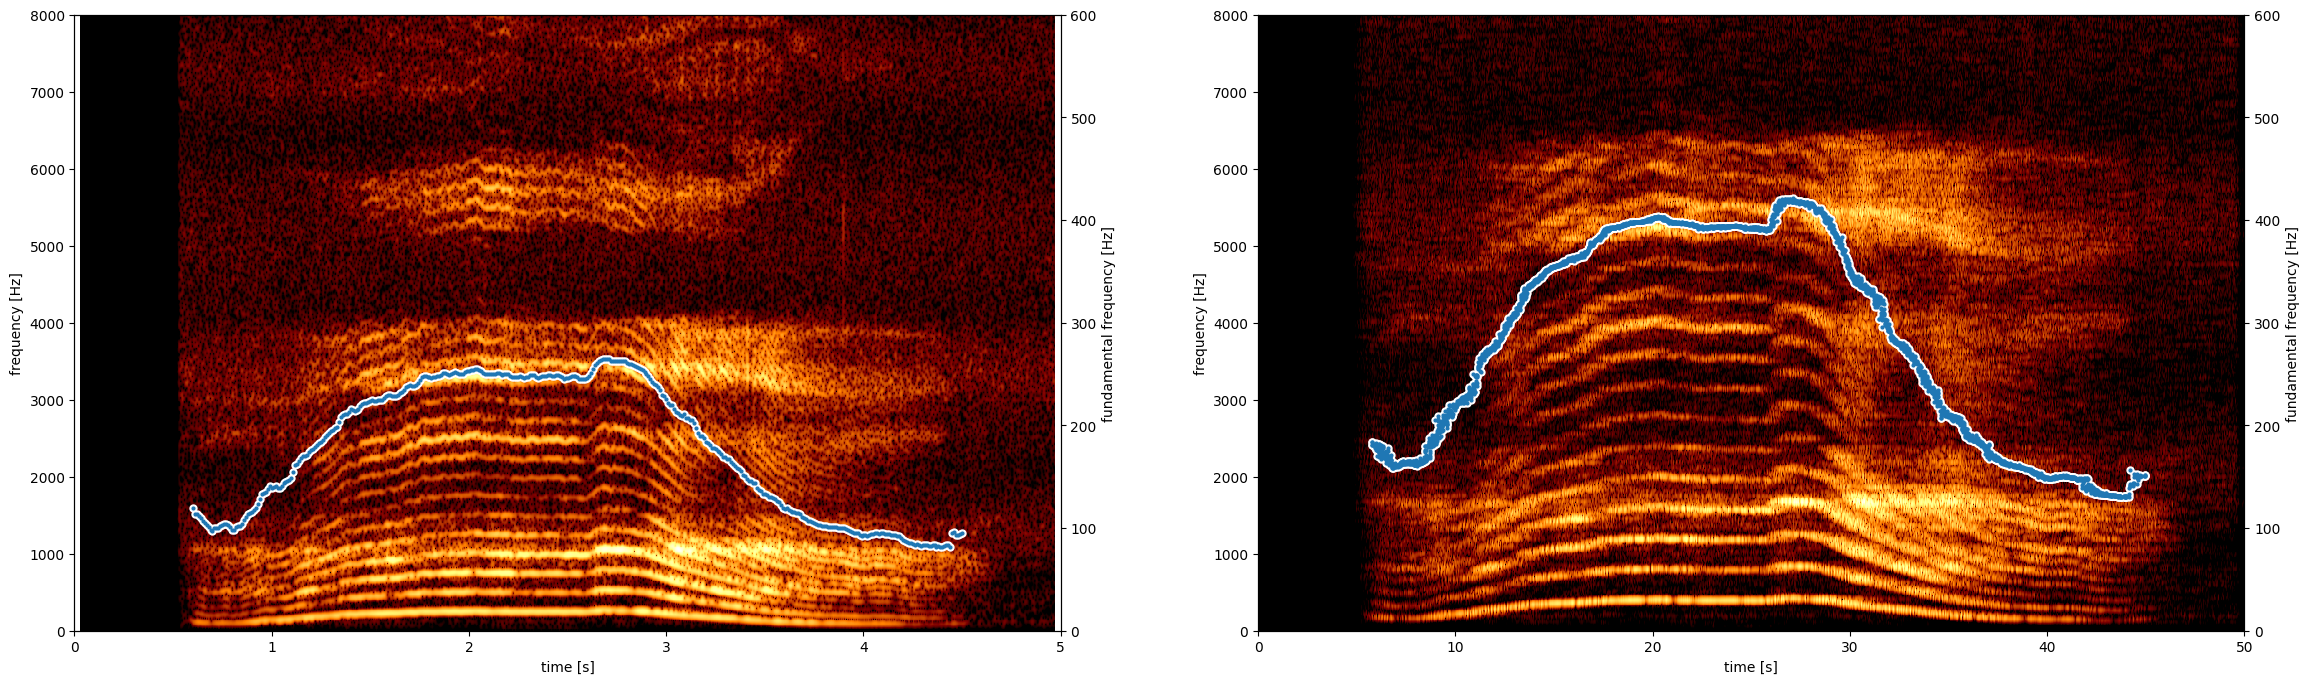

In [42]:
plt.figure(figsize=(28, 8))

plt.subplot(1,2,1)
snd = parselmouth.Sound(human_sound_file)
pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)

draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])

plt.subplot(1,2,2)
snd = parselmouth.Sound('output.wav')
pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)

draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])

plt.show()

In [ ]:
Audio(human_sound_file, autoplay=False)

In [ ]:
Audio('output.wav', autoplay=False)